In this demonstration, we consider the following 1-D Gaussian mixture density function:
$$
f(x) \propto 0.5 \exp \left( \frac{(q-1)^2}{2 \times 0.35^2} \right) + 0.5 \exp \left( \frac{(q+1)^2}{2 \times 0.35^2}\right),
$$
where the right hand side is considered as the function of exponentialized negative potential energy $\exp (-U(q))$. The kinetic energy is selected as 

In [1]:
import sys
sys.path.append('../')
from hamilton_neural_network import (
    TrainTestData,
    HamiltonianNeuralNetwork,
    LatentHamiltonianNeuralNetwork,
)
from hamilton_system import HamiltonianSystem
from pdf_models import IndepedentGaussians, OneDimGaussianMixtureDensity
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(0)

Generating samples...
Finished generating samples.


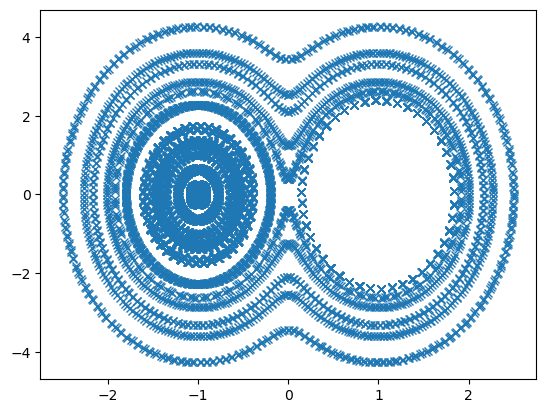

In [2]:
expU = OneDimGaussianMixtureDensity()
expK = IndepedentGaussians(tf.constant([0.0]), tf.constant([1.0]))
q0 = tf.constant([2.5])
p0 = tf.constant([0.0])
T = 20.0
leap_frog_per_unit = 20
num_samples =20
num_train = int(0.9 * num_samples * leap_frog_per_unit * T)
train_test_data = TrainTestData(
    num_samples, expU, expK, T, leap_frog_per_unit, q0, p0
)
samples = train_test_data()
tf.io.write_file("../exps/train_test_data.txt", tf.io.serialize_tensor(samples))
plt.plot(samples[:, 0], samples[:, 1], "x")
plt.show()

In [3]:
file = tf.io.read_file("../exps/train_test_data.txt")
train_test_data = tf.io.parse_tensor(file, out_type=tf.float32)
train_data = train_test_data[:num_train, :]
test_data = train_test_data[num_train:, :]
hnn = HamiltonianNeuralNetwork(3, 16, train_data, test_data)
hnn.build(input_shape=(1, 2))
train_hist, test_hist = hnn.train(15000, 1000, 1e-4)
hnn.save_weights("../exps/demo_1_hnn.weights.h5")

Training started...
Epoch 100: Train loss 1.4370551109313965, Test loss 8.853404998779297.
Epoch 200: Train loss 1.2385563850402832, Test loss 6.535617828369141.
Epoch 300: Train loss 0.8697612285614014, Test loss 3.7601547241210938.
Epoch 400: Train loss 0.5272162556648254, Test loss 2.4783339500427246.
Epoch 500: Train loss 0.4541952610015869, Test loss 2.055866003036499.
Epoch 600: Train loss 0.3775182366371155, Test loss 1.7071346044540405.
Epoch 700: Train loss 0.29519012570381165, Test loss 1.3780062198638916.
Epoch 800: Train loss 0.23445427417755127, Test loss 1.0682799816131592.
Epoch 900: Train loss 0.20424500107765198, Test loss 0.8122888207435608.
Epoch 1000: Train loss 0.1951267272233963, Test loss 0.6193133592605591.
Epoch 1100: Train loss 0.1948907971382141, Test loss 0.47400400042533875.
Epoch 1200: Train loss 0.19155143201351166, Test loss 0.35453975200653076.
Epoch 1300: Train loss 0.175517737865448, Test loss 0.2526102364063263.
Epoch 1400: Train loss 0.1462508141994

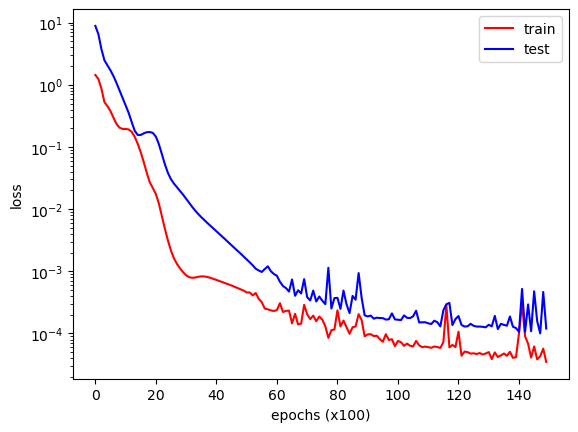

In [4]:
ax, fig = plt.subplots()
fig.plot(train_hist, label="train", color="red")
fig.plot(test_hist, label="test", color="blue")
fig.legend()
fig.set_yscale("log")
fig.set_xlabel("epochs (x100)")
fig.set_ylabel("loss")
plt.show()

In [5]:
file = tf.io.read_file("../exps/train_test_data.txt")
train_test_data = tf.io.parse_tensor(file, out_type=tf.float32)
train_data = train_test_data[:num_train, :]
test_data = train_test_data[num_train:, :]
lhnn = LatentHamiltonianNeuralNetwork(3, 16, 4, train_data, test_data)
lhnn.build(input_shape=(1, 2))
train_hist, test_hist = lhnn.train(15000, 1000, 1e-4)
lhnn.save_weights("../exps/demo_1_lhnn.weights.h5")

Training started...
Epoch 0: Train loss 1.8965853452682495, Test loss 10.48815631866455.
Epoch 100: Train loss 1.3207244873046875, Test loss 8.052658081054688.
Epoch 200: Train loss 1.0449978113174438, Test loss 4.723893165588379.
Epoch 300: Train loss 0.43503791093826294, Test loss 1.8079833984375.
Epoch 400: Train loss 0.02136101759970188, Test loss 0.7181633710861206.
Epoch 500: Train loss 0.032139621675014496, Test loss 0.42576926946640015.
Epoch 600: Train loss 0.0341789536178112, Test loss 0.17705395817756653.
Epoch 700: Train loss 0.019467215985059738, Test loss 0.062484707683324814.
Epoch 800: Train loss 0.019128328189253807, Test loss 0.05722726136445999.
Epoch 900: Train loss 0.01786113530397415, Test loss 0.04503040760755539.
Epoch 1000: Train loss 0.009890063665807247, Test loss 0.025828350335359573.
Epoch 1100: Train loss 0.005276156589388847, Test loss 0.02137731947004795.
Epoch 1200: Train loss 0.0036544641479849815, Test loss 0.019962288439273834.
Epoch 1300: Train loss

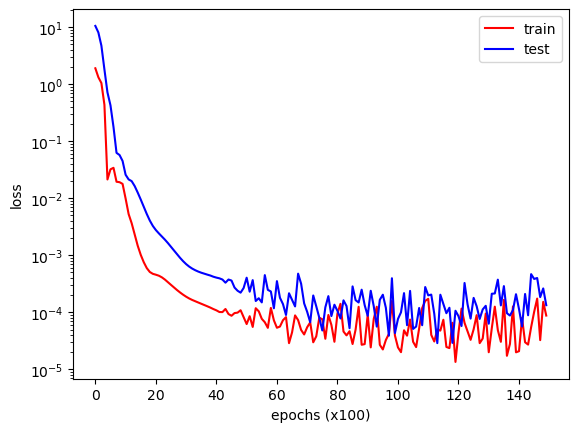

In [6]:
ax, fig = plt.subplots()
fig.plot(train_hist, label="train", color="red")
fig.plot(test_hist, label="test", color="blue")
fig.legend()
fig.set_yscale("log")
fig.set_xlabel("epochs (x100)")
fig.set_ylabel("loss")
plt.show()

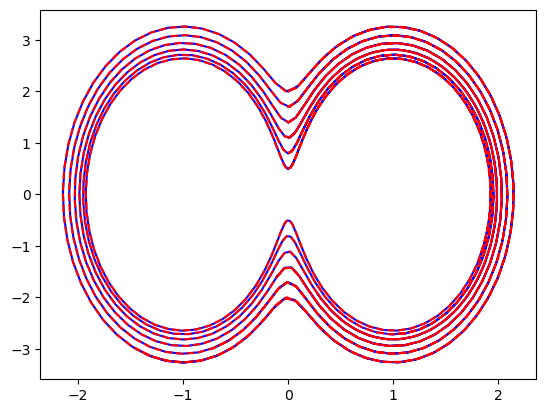

In [7]:
hnn = HamiltonianNeuralNetwork(3, 16, None, None)
hnn.build(input_shape=(1, 2))
q0 = tf.constant([0.0])
hnn.load_weights("../exps/demo_1_hnn.weights.h5")

fig, ax = plt.subplots()
p_list = tf.linspace(0.5, 2.0, 6)
dt = 1.0 / 20
n_steps = 120
original_hamiltonian = HamiltonianSystem(expU, expK)

for i in range(6):
    p0 = tf.constant([p_list[i].numpy()])
    hist_original = original_hamiltonian.symplectic_integrate(q0, p0, dt, n_steps)
    hist_hnn = hnn.symplectic_integrate(q0, p0, dt, n_steps)
    ax.plot(
        hist_original[:, 0],
        hist_original[:, 1],
        label="Numerical gradients",
        color="blue",
    )
    ax.plot(
        hist_hnn[:, 0],
        hist_hnn[:, 1],
        color="red",
        label="HNNs",
        linestyle="--",
    )
plt.show()

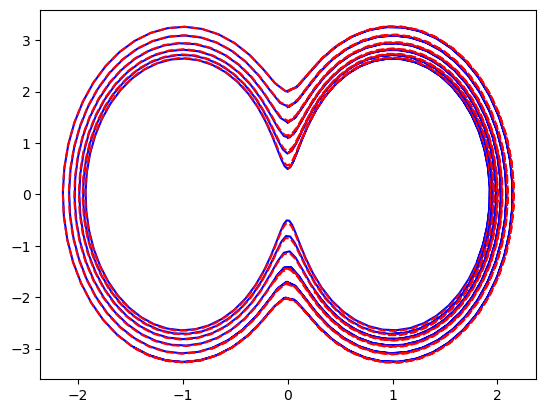

In [8]:
lhnn = LatentHamiltonianNeuralNetwork(3, 16, 4, None, None)
lhnn.build(input_shape=(1, 2))
q0 = tf.constant([0.0])
lhnn.load_weights("../exps/demo_1_lhnn.weights.h5")

fig, ax = plt.subplots()
p_list = tf.linspace(0.5, 2.0, 6)
dt = 1.0 / 20
n_steps = 120
original_hamiltonian = HamiltonianSystem(expU, expK)

for i in range(6):
    p0 = tf.constant([p_list[i].numpy()])
    hist_original = original_hamiltonian.symplectic_integrate(q0, p0, dt, n_steps)
    hist_lhnn = lhnn.symplectic_integrate(q0, p0, dt, n_steps)
    ax.plot(
        hist_original[:, 0],
        hist_original[:, 1],
        label="Numerical gradients",
        color="blue",
    )
    ax.plot(
        hist_lhnn[:, 0],
        hist_lhnn[:, 1],
        color="red",
        label="HNNs",
        linestyle="--",
    )
plt.show()